# Natural Language Processing
## Assignment 1
### Rhichard Koh

In [1]:
from sklearn.datasets import fetch_20newsgroups
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
import pandas as pd
import seaborn as sns
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
categories = ['sci.crypt', 'sci.space']

# Fetch the dataset
train = fetch_20newsgroups(subset='train', categories=categories,
                           shuffle=True,
                           random_state=42,
                           remove=('headers', 'footers', 'quotes'),
                           )

In [3]:
# indices of empty or whitespace-only documents
empty_indices = [i for i, text in enumerate(train.data) if not text.strip()]


# Remove empty or whitespace-only documents using the empty_indices
train.data = [text for i, text in enumerate(train.data) if i not in empty_indices]
train.target = [target for i, target in enumerate(train.target) if i not in empty_indices]

In [4]:
# Preprocessing function
def preprocess(text):
    # Tokenization and lowercasing
    tokens = word_tokenize(text.lower())

    # Removing punctuation
    tokens = [re.sub(r'[^a-z0-9]+', '', token) for token in tokens]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token != '']

    return ' '.join(tokens)

# Applying preprocessing to each document in the training data
preprocessed_data = [preprocess(text) for text in train.data]

In [5]:
# Create df to view the data better
df = pd.DataFrame(
    {
        "text":preprocessed_data,
        "category":train.target
    }
)
df['category'] = df['category'].apply(lambda x: train.target_names[x])

In [6]:
# Preview the df
df

text   category
0     prize like going need worded carefully enough ...  sci.space
1     probably repost another title guys thread woul...  sci.space
2     interesting rigth wonder make mention astronau...  sci.space
3     nt seen speculation salyut kb design bureau pl...  sci.space
4     hi interested source feal encryption algorithm...  sci.crypt
...                                                 ...        ...
1154  quite true one instruments mars observer searc...  sci.space
1155  cryptographic algorythm must kept secret priva...  sci.crypt
1156  means eff public stance complicated issues irr...  sci.crypt
1157  crypto 93 conference announcement final call p...  sci.crypt
1158  use ground launch pad entirely posible launch ...  sci.space

[1159 rows x 2 columns]

In [7]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data to create TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(preprocessed_data)

In [8]:
# gensim api to create word vectors
import gensim.downloader as api
wv = api.load("word2vec-google-news-300")

In [9]:
# Use en_core_web_lg for text pre-processing
nlp = spacy.load("en_core_web_lg")

In [10]:
# Create a list to store the word vectors
word_vectors = []

In [11]:
# Calculating the mean vector for each word in each corpus
for i in range(df.shape[0]):
  vector = wv.get_mean_vector([token.text for token in nlp(df['text'][i])])
  word_vectors.append(vector)

In [12]:
# Previewing the word vectors
word_vectors

[array([ 1.53001864e-02,  2.48504896e-02, -8.89778789e-03,  3.73694338e-02,
        -3.01312450e-02,  5.36135025e-03,  2.84885298e-02, -2.41414607e-02,
         2.70714648e-02,  2.65868194e-02, -2.75513791e-02, -4.02791202e-02,
        -1.92100201e-02,  1.55260181e-02, -3.47378775e-02,  2.92953644e-02,
         2.73371618e-02,  3.09550967e-02,  1.16145238e-02, -2.12687794e-02,
        -1.67040993e-02,  1.70896836e-02, -7.44783692e-03, -7.02537969e-03,
         2.21757796e-02, -4.82337363e-02, -3.29042226e-02, -3.21943080e-04,
         4.96703945e-03, -1.25260409e-02, -4.53650299e-03,  4.66482528e-03,
        -4.27117757e-03, -3.50342244e-02,  1.38743948e-02, -5.82653005e-03,
         2.76196525e-02,  1.45340841e-02,  1.05446056e-02,  1.43508883e-02,
         4.52494472e-02, -1.33487564e-02,  6.86375648e-02,  9.70945880e-03,
         8.91219752e-05, -1.80492215e-02, -1.33887688e-02, -1.25519475e-02,
        -3.21392016e-03, -5.87762939e-03, -2.40314156e-02,  3.46287191e-02,
        -1.6

In [13]:
# 2D stacking the word vectors
word_vectors_2d = np.stack(word_vectors)
word_vectors_2d

array([[ 1.53001864e-02,  2.48504896e-02, -8.89778789e-03, ...,
        -1.67104695e-02,  1.62406941e-03, -3.99479689e-03],
       [ 1.90196224e-02,  5.91431279e-03,  1.77362002e-03, ...,
        -3.36845294e-02,  1.11508286e-02, -1.68958511e-02],
       [ 9.78849828e-03, -3.68260771e-05,  1.00763906e-02, ...,
        -3.04606110e-02,  1.51486667e-02, -2.69666370e-02],
       ...,
       [ 6.38413103e-03,  6.40041940e-03,  7.99231511e-03, ...,
        -2.91827954e-02, -5.62170194e-03,  1.32369585e-02],
       [-7.78346974e-03,  4.52489563e-04,  1.13235386e-02, ...,
        -1.86306182e-02, -4.36650449e-03, -3.14911152e-03],
       [ 7.31114764e-03,  1.47721637e-02,  1.58580169e-02, ...,
        -3.54539882e-03, -1.04897907e-02, -5.31009398e-03]], dtype=float32)

In [14]:
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the training data to create document word vectors
doc_word_vectors = count_vectorizer.fit_transform(preprocessed_data)

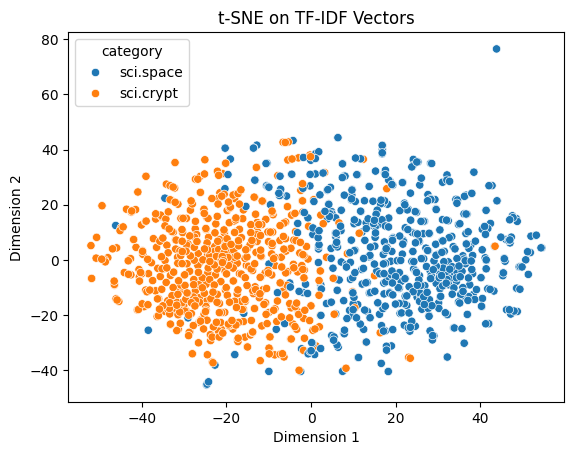

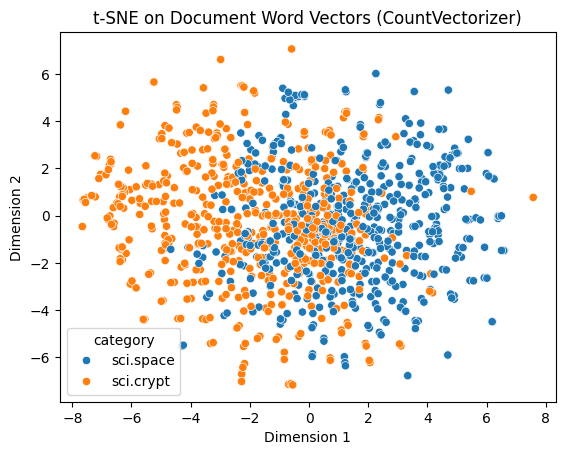

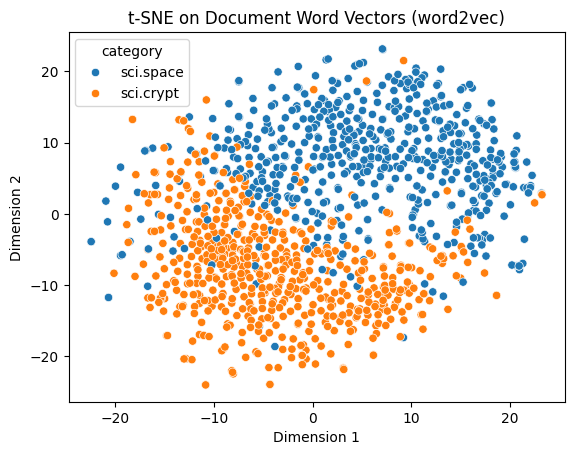

In [15]:
# Function to apply t-SNE and plot the result
def plot_tsne(data, label, title='t-SNE visualization'):
    tsne = TSNE(n_components=2, random_state=42, init='random')
    tsne_result = tsne.fit_transform(data)
    df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    df['category'] = label
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='category', data=df)
    plt.title(title)
    plt.show()

# Apply t-SNE on TF-IDF vectors
plot_tsne(tfidf_vectors, df['category'], title='t-SNE on TF-IDF Vectors')

# Apply t-SNE on Document Word Vectors
plot_tsne(doc_word_vectors, df['category'], title='t-SNE on Document Word Vectors (CountVectorizer)')

# Apply t-SNE on Document Word Vectors
plot_tsne(word_vectors_2d, df['category'], title='t-SNE on Document Word Vectors (word2vec)')


When Comparing TfidfVectorizer() and CountVectorizer() we can observe that the TfidfVectorizer() has a more sparse cluster where as the CountVectorizer() has a more dense cluster. When looking for anomalies in our dataset i believe using CountVectorizer() would be more useful.

Since TfidfVectorizer() weights terms based on their importance across the corpus, the resulting t-SNE visualization is likely to show more distinct clusters. Documents that are about similar topics (and thus share unique, topic-specific words) will be closer together. Since CountVectorizer() relies on raw term frequencies, documents with similar word counts but possibly different contexts might end up close to each other. This could lead to denser clusters, especially for common words that appear frequently across multiple documents.

For TfidfVectorizer() the impact of common but uninformative words will be diminished, potentially leading to a clearer separation between different topics or categories within the data. Making the spread and separation of points in the visualization might be more variable, reflecting the diversity of topics and the unique terms associated with them. This could result in a more informative visualization that better distinguishes between different types of documents. Whereas CountVectorizer() has common words that are not particularly informative about the document's content (like "the", "is", "at") might dominate the vector space, potentially leading to a less meaningful separation between different topics or categories within the data. Making the visualization might show a more uniform or less differentiated spread if many documents share a similar set of high-frequency words, making it harder to distinguish between different document groups or topics.

In conclusion the best model was TF-IDF followed by Word2Vec then CountVectorizer in last place.